In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
data = pd.read_csv('c:/fetal_health.csv')

In [4]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,2.4,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,10.4,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,13.4,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,23.0,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,19.9,1


EDA

In [81]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Report")

In [6]:
# Checking for na
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
fetal_health                                              0
dtype: int64

In [7]:
# Checking for duplicates 
data.duplicated().sum()

14

In [8]:
data = data.drop_duplicates()

In [9]:
data['fetal_health'].value_counts()

1    1646
2     292
3     174
Name: fetal_health, dtype: int64

In [10]:
X = data.drop(['fetal_health'],axis=1)
y = data['fetal_health']

In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [12]:
X_train_res, y_train_res = sm.fit_resample(X, y)

In [13]:
X_train_res.shape

(4938, 11)

In [14]:
y_train_res.shape

(4938,)

In [15]:
y_train_res.value_counts()

2    1646
1    1646
3    1646
Name: fetal_health, dtype: int64

In [16]:
data = X_train_res.join(y_train_res)
data.shape

(4938, 12)

In [17]:
X = data.iloc[:,:-1]
print(X.shape)
y = data.iloc[:,-1]
print(y.shape)

(4938, 11)
(4938,)


Removing MultiCollinearity

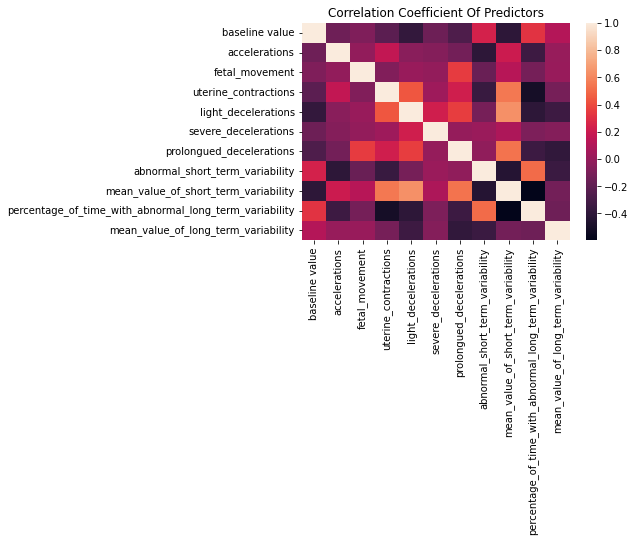

In [18]:
sns.heatmap(X.corr())
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [20]:
calc_vif(X)

,variables,VIF
0,baseline value,46.393547
1,accelerations,1.942647
2,fetal_movement,1.335046
3,uterine_contractions,4.231476
4,light_decelerations,3.302468
5,severe_decelerations,1.093470
6,prolongued_decelerations,3.037133
7,abnormal_short_term_variability,23.552186
8,mean_value_of_short_term_variability,8.338861
9,percentage_of_time_with_abnormal_long_term_var...,3.652759


 Here we will drop baseline value first as the VIF is highest

In [21]:
X = X.drop(['baseline value'],axis =1)

In [22]:
calc_vif(X)

,variables,VIF
0,accelerations,1.657846
1,fetal_movement,1.303619
2,uterine_contractions,3.686137
3,light_decelerations,3.302023
4,severe_decelerations,1.093469
5,prolongued_decelerations,3.019605
6,abnormal_short_term_variability,7.805492
7,mean_value_of_short_term_variability,7.949766
8,percentage_of_time_with_abnormal_long_term_var...,3.294923
9,mean_value_of_long_term_variability,3.309434


In [23]:
X = X.drop(['abnormal_short_term_variability'],axis =1)

In [24]:
calc_vif(X)

,variables,VIF
0,accelerations,1.572879
1,fetal_movement,1.285853
2,uterine_contractions,3.458466
3,light_decelerations,3.031050
4,severe_decelerations,1.083250
5,prolongued_decelerations,2.497121
6,mean_value_of_short_term_variability,7.883361
7,percentage_of_time_with_abnormal_long_term_var...,1.220148
8,mean_value_of_long_term_variability,2.411540


In [25]:
X = X.drop(['mean_value_of_short_term_variability'],axis =1)

In [26]:
calc_vif(X)

,variables,VIF
0,accelerations,1.349179
1,fetal_movement,1.285386
2,uterine_contractions,3.025801
3,light_decelerations,2.064719
4,severe_decelerations,1.083206
5,prolongued_decelerations,1.773227
6,percentage_of_time_with_abnormal_long_term_var...,1.219742
7,mean_value_of_long_term_variability,1.915788


In [27]:
data = X.join(y)

In [28]:
data.head()

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,0.000,0.0,0.000,0.000,0.0,0.0,43,2.4,2
1,0.006,0.0,0.006,0.003,0.0,0.0,0,10.4,1
2,0.003,0.0,0.008,0.003,0.0,0.0,0,13.4,1
3,0.003,0.0,0.008,0.003,0.0,0.0,0,23.0,1
4,0.007,0.0,0.008,0.000,0.0,0.0,0,19.9,1


Fit Logistic regression and LDA

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_x, test_x, train_y, test_y = train_test_split(data.drop(columns=['fetal_health']), data['fetal_health'],train_size=0.8)

In [31]:
test_y.unique()

array([2, 3, 1], dtype=int64)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr_model = LogisticRegression()
lr_model.fit(train_x, train_y)

C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
lr_model.score(train_x,train_y)

0.6635443037974683

In [35]:
lr_model.score(test_x,test_y)

0.6751012145748988

In [36]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [37]:
params = dict(penalty = ['l1','l2','elasticnet'], class_weight = [None, 'balanced'], C= np.arange(0.25, 5, 0.5), solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], multi_class=['ovr', 'multinomial'])

In [38]:
gs = GridSearchCV(LogisticRegression(), params)

In [39]:
gs.fit(train_x, train_y)

C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75]),
                         'class_weight': [None, 'balanced'],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [40]:
gs.best_estimator_  

LogisticRegression(C=4.75, multi_class='ovr', penalty='l1', solver='liblinear')

In [41]:
lr_model = LogisticRegression(C=4.75, multi_class='ovr', penalty='l1', solver='liblinear')
lr_model.fit(train_x, train_y)

LogisticRegression(C=4.75, multi_class='ovr', penalty='l1', solver='liblinear')

In [42]:
lr_model.score(train_x,train_y)

0.7789873417721519

In [43]:
lr_model.score(test_x,test_y)

0.8006072874493927

In [44]:
ypred = lr_model.predict(test_x)

<AxesSubplot:>

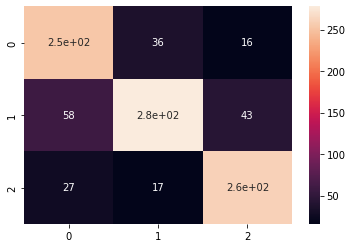

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ypred,test_y)
sns.heatmap(cm,annot=True)

In [48]:
# Cross Validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model,test_x,test_y,scoring = "neg_mean_squared_error",cv =10,verbose=1)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

0.7098097321813036


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [64]:
lda = LinearDiscriminantAnalysis()
lda.fit(train_x, train_y)

LinearDiscriminantAnalysis()

In [65]:
lda.score(train_x,train_y)

0.8144303797468354

In [82]:
lda.score(test_x, test_y)

0.8087044534412956

In [84]:
# Cross Validation score
scores = cross_val_score(lda,test_x,test_y,scoring = "neg_mean_squared_error",cv =10,verbose=1)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

0.491372229584287


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [75]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250)
model.fit(train_x,train_y)

RandomForestClassifier(n_estimators=250)

In [76]:
model.score(train_x,train_y)

0.9992405063291139

In [77]:
model.score(test_x,test_y)

0.944331983805668

<AxesSubplot:>

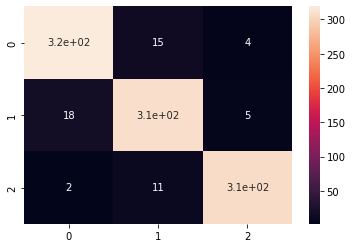

In [78]:
from sklearn.metrics import accuracy_score
y_pred=lg.predict(test_x)
cm = confusion_matrix(test_y, y_pred)
sns.heatmap(cm,annot=True)

In [80]:
# Cross Validation score
scores = cross_val_score(model,test_x,test_y,scoring = "neg_mean_squared_error",cv =10,verbose=1)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.3599093882363339


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.4s finished
